Columns in the dataset: Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
Mean Squared Error (MSE): 31.873635550729933
Root Mean Squared Error (RMSE): 5.645674056366515


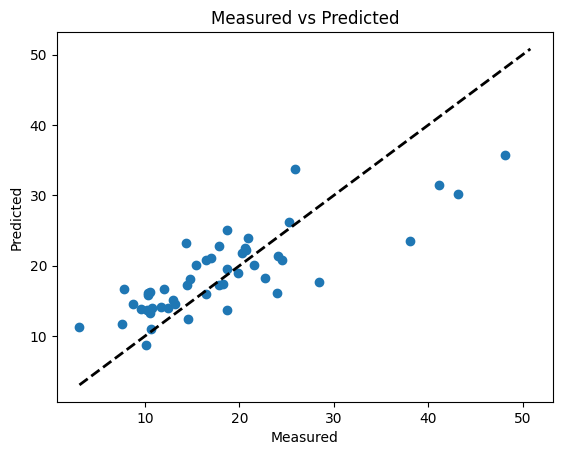

Model saved as linear_regression_model.pkl


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import joblib


url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'
data = pd.read_csv(url)


print("Columns in the dataset:", data.columns)
print(data.head())

target_column = 'total_bill'

if target_column not in data.columns:
    raise KeyError(f"Target column '{target_column}' not found in the dataset")

X = data.drop(columns=[target_column])
y = data[target_column]

X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted')
plt.show()

joblib.dump(model, 'linear_regression_model.pkl')
print("Model saved as linear_regression_model.pkl")
